# AQ project

## Visualización por tiempo y zonas H3

In [1]:
import pandas as pd
import os
import h3

from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append('../src')

from clean_support import NO2_clean, estacion_timeseries

### Estaciones de toma de datos

In [4]:
estaciones = pd.read_csv("../data/AytoMad/informacion_estaciones_red_calidad_aire.csv", sep=';')
estaciones.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,SO2,CO,PM10,PM2_5,O3,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,X,X,NaN,NaN,NaN,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,X,X,X,X,X,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,NaN,NaN,NaN,NaN,NaN,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


In [5]:
estaciones.columns = [col.capitalize() for col in estaciones.columns]

In [6]:
estaciones.head()

,Codigo,Codigo_corto,Estacion,Direccion,Longitud_etrs89,Latitud_etrs89,Altitud,Cod_tipo,Nom_tipo,No2,So2,Co,Pm10,Pm2_5,O3,Btx,Cod_via,Via_clase,Via_par,Via_nombre,Fecha alta,Coordenada_x_etrs89,Coordenada_y_etrs89,Longitud,Latitud
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,X,X,NaN,NaN,NaN,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,X,X,X,X,X,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,NaN,NaN,NaN,NaN,NaN,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


In [7]:
estaciones.columns

Index(['Codigo', 'Codigo_corto', 'Estacion', 'Direccion', 'Longitud_etrs89',
       'Latitud_etrs89', 'Altitud', 'Cod_tipo', 'Nom_tipo', 'No2', 'So2', 'Co',
       'Pm10', 'Pm2_5', 'O3', 'Btx', 'Cod_via', 'Via_clase', 'Via_par',
       'Via_nombre', 'Fecha alta', 'Coordenada_x_etrs89',
       'Coordenada_y_etrs89', 'Longitud', 'Latitud'],
      dtype='object')

In [8]:
coords = estaciones.drop(['Codigo', 'Estacion', 'Direccion', 'Longitud_etrs89',
       'Latitud_etrs89', 'Altitud', 'Cod_tipo', 'Nom_tipo', 'No2', 'So2', 'Co',
       'Pm10', 'Pm2_5', 'O3', 'Btx', 'Cod_via', 'Via_clase', 'Via_par',
       'Via_nombre', 'Fecha alta', 'Coordenada_x_etrs89',
       'Coordenada_y_etrs89'], axis=1)

In [9]:
coords.head()

,Codigo_corto,Longitud,Latitud
0,4,-3.712257,40.423882
1,8,-3.682316,40.421553
2,11,-3.677349,40.451473
3,16,-3.639242,40.440046
4,17,-3.713317,40.347147


In [10]:
coords = coords.rename(columns={'Codigo_corto': 'Estacion'})

### Datos por horas

*NO2 es la magnitud 8. A continuación se muestran los datos de abril 2023*

In [11]:
df = pd.read_csv("../data/AytoMad/Anio23/abr_mo23.csv", sep=';')
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2023,4,1,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,28,79,4,1,28079004_1_38,2023,4,2,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
2,28,79,4,1,28079004_1_38,2023,4,3,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,79,4,1,28079004_1_38,2023,4,4,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4,28,79,4,1,28079004_1_38,2023,4,5,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,3.0,V,2.0,N,1.0,N,3.0,N,127.0,N,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [12]:
df2304 = df[df["MAGNITUD"] == 8]

In [13]:
df2304.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
90,28,79,4,8,28079004_8_8,2023,4,1,10.0,V,14.0,V,9.0,V,7.0,V,3.0,V,2.0,V,4.0,V,6.0,V,14.0,V,15.0,V,11.0,V,10.0,V,7.0,V,7.0,V,5.0,V,4.0,V,3.0,V,7.0,V,8.0,V,6.0,V,10.0,V,13.0,V,11.0,V,16.0,V
91,28,79,4,8,28079004_8_8,2023,4,2,12.0,V,16.0,V,21.0,V,15.0,V,7.0,V,6.0,V,10.0,V,20.0,V,30.0,V,27.0,V,17.0,V,10.0,V,7.0,V,5.0,V,6.0,V,5.0,V,5.0,V,5.0,V,8.0,V,11.0,V,12.0,V,17.0,V,19.0,V,20.0,V
92,28,79,4,8,28079004_8_8,2023,4,3,11.0,V,11.0,V,9.0,V,6.0,V,5.0,V,13.0,V,28.0,V,52.0,V,57.0,V,44.0,V,44.0,V,36.0,V,33.0,V,27.0,V,26.0,V,21.0,V,21.0,V,11.0,V,10.0,V,13.0,V,26.0,V,30.0,V,26.0,V,23.0,V
93,28,79,4,8,28079004_8_8,2023,4,4,16.0,V,38.0,V,33.0,V,22.0,V,18.0,V,21.0,V,17.0,V,67.0,V,50.0,V,32.0,V,24.0,V,20.0,V,14.0,V,10.0,V,7.0,V,7.0,V,8.0,V,8.0,V,9.0,V,9.0,V,13.0,V,15.0,V,18.0,V,15.0,V
94,28,79,4,8,28079004_8_8,2023,4,5,14.0,V,18.0,V,13.0,V,12.0,V,10.0,V,18.0,V,33.0,V,53.0,V,65.0,V,26.0,N,115.0,N,132.0,N,23.0,N,15.0,V,15.0,V,14.0,V,11.0,V,14.0,V,17.0,V,22.0,V,32.0,V,76.0,V,94.0,V,85.0,V


In [14]:
df2304 = df2304.drop(columns=[e for e in df.columns if 'V' in e])

In [15]:
df2304.head()

,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
90,79,4,8,28079004_8_8,2023,4,1,10.0,14.0,9.0,7.0,3.0,2.0,4.0,6.0,14.0,15.0,11.0,10.0,7.0,7.0,5.0,4.0,3.0,7.0,8.0,6.0,10.0,13.0,11.0,16.0
91,79,4,8,28079004_8_8,2023,4,2,12.0,16.0,21.0,15.0,7.0,6.0,10.0,20.0,30.0,27.0,17.0,10.0,7.0,5.0,6.0,5.0,5.0,5.0,8.0,11.0,12.0,17.0,19.0,20.0
92,79,4,8,28079004_8_8,2023,4,3,11.0,11.0,9.0,6.0,5.0,13.0,28.0,52.0,57.0,44.0,44.0,36.0,33.0,27.0,26.0,21.0,21.0,11.0,10.0,13.0,26.0,30.0,26.0,23.0
93,79,4,8,28079004_8_8,2023,4,4,16.0,38.0,33.0,22.0,18.0,21.0,17.0,67.0,50.0,32.0,24.0,20.0,14.0,10.0,7.0,7.0,8.0,8.0,9.0,9.0,13.0,15.0,18.0,15.0
94,79,4,8,28079004_8_8,2023,4,5,14.0,18.0,13.0,12.0,10.0,18.0,33.0,53.0,65.0,26.0,115.0,132.0,23.0,15.0,15.0,14.0,11.0,14.0,17.0,22.0,32.0,76.0,94.0,85.0


In [16]:
df2304.drop(['MUNICIPIO', 'MAGNITUD', 'PUNTO_MUESTREO'], axis=1, inplace = True)

In [17]:
df2304.head()

,ESTACION,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
90,4,2023,4,1,10.0,14.0,9.0,7.0,3.0,2.0,4.0,6.0,14.0,15.0,11.0,10.0,7.0,7.0,5.0,4.0,3.0,7.0,8.0,6.0,10.0,13.0,11.0,16.0
91,4,2023,4,2,12.0,16.0,21.0,15.0,7.0,6.0,10.0,20.0,30.0,27.0,17.0,10.0,7.0,5.0,6.0,5.0,5.0,5.0,8.0,11.0,12.0,17.0,19.0,20.0
92,4,2023,4,3,11.0,11.0,9.0,6.0,5.0,13.0,28.0,52.0,57.0,44.0,44.0,36.0,33.0,27.0,26.0,21.0,21.0,11.0,10.0,13.0,26.0,30.0,26.0,23.0
93,4,2023,4,4,16.0,38.0,33.0,22.0,18.0,21.0,17.0,67.0,50.0,32.0,24.0,20.0,14.0,10.0,7.0,7.0,8.0,8.0,9.0,9.0,13.0,15.0,18.0,15.0
94,4,2023,4,5,14.0,18.0,13.0,12.0,10.0,18.0,33.0,53.0,65.0,26.0,115.0,132.0,23.0,15.0,15.0,14.0,11.0,14.0,17.0,22.0,32.0,76.0,94.0,85.0


In [18]:
df2304 = df2304.rename(columns={e: e[1:] for e in df2304.columns if 'h' in e})

In [19]:
for e in df2304.columns:
    
    if 'h' in e: df = df2304.rename({e: e[1:]})
    else: pass

In [20]:
df2304.head()

,ESTACION,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
90,4,2023,4,1,10.0,14.0,9.0,7.0,3.0,2.0,4.0,6.0,14.0,15.0,11.0,10.0,7.0,7.0,5.0,4.0,3.0,7.0,8.0,6.0,10.0,13.0,11.0,16.0
91,4,2023,4,2,12.0,16.0,21.0,15.0,7.0,6.0,10.0,20.0,30.0,27.0,17.0,10.0,7.0,5.0,6.0,5.0,5.0,5.0,8.0,11.0,12.0,17.0,19.0,20.0
92,4,2023,4,3,11.0,11.0,9.0,6.0,5.0,13.0,28.0,52.0,57.0,44.0,44.0,36.0,33.0,27.0,26.0,21.0,21.0,11.0,10.0,13.0,26.0,30.0,26.0,23.0
93,4,2023,4,4,16.0,38.0,33.0,22.0,18.0,21.0,17.0,67.0,50.0,32.0,24.0,20.0,14.0,10.0,7.0,7.0,8.0,8.0,9.0,9.0,13.0,15.0,18.0,15.0
94,4,2023,4,5,14.0,18.0,13.0,12.0,10.0,18.0,33.0,53.0,65.0,26.0,115.0,132.0,23.0,15.0,15.0,14.0,11.0,14.0,17.0,22.0,32.0,76.0,94.0,85.0


In [21]:
fechas_str = df2304['ANO'].astype(str) + '-' + df2304['MES'].astype(str) + '-' + df2304['DIA'].astype(str)
df2304['FECHA'] = pd.to_datetime(fechas_str, errors='coerce')

df2304.head()

,ESTACION,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,FECHA
90,4,2023,4,1,10.0,14.0,9.0,7.0,3.0,2.0,4.0,6.0,14.0,15.0,11.0,10.0,7.0,7.0,5.0,4.0,3.0,7.0,8.0,6.0,10.0,13.0,11.0,16.0,2023-04-01
91,4,2023,4,2,12.0,16.0,21.0,15.0,7.0,6.0,10.0,20.0,30.0,27.0,17.0,10.0,7.0,5.0,6.0,5.0,5.0,5.0,8.0,11.0,12.0,17.0,19.0,20.0,2023-04-02
92,4,2023,4,3,11.0,11.0,9.0,6.0,5.0,13.0,28.0,52.0,57.0,44.0,44.0,36.0,33.0,27.0,26.0,21.0,21.0,11.0,10.0,13.0,26.0,30.0,26.0,23.0,2023-04-03
93,4,2023,4,4,16.0,38.0,33.0,22.0,18.0,21.0,17.0,67.0,50.0,32.0,24.0,20.0,14.0,10.0,7.0,7.0,8.0,8.0,9.0,9.0,13.0,15.0,18.0,15.0,2023-04-04
94,4,2023,4,5,14.0,18.0,13.0,12.0,10.0,18.0,33.0,53.0,65.0,26.0,115.0,132.0,23.0,15.0,15.0,14.0,11.0,14.0,17.0,22.0,32.0,76.0,94.0,85.0,2023-04-05


In [22]:
df = df2304.drop(['ANO', 'MES', 'DIA'], axis=1)
df.head()

,ESTACION,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,FECHA
90,4,10.0,14.0,9.0,7.0,3.0,2.0,4.0,6.0,14.0,15.0,11.0,10.0,7.0,7.0,5.0,4.0,3.0,7.0,8.0,6.0,10.0,13.0,11.0,16.0,2023-04-01
91,4,12.0,16.0,21.0,15.0,7.0,6.0,10.0,20.0,30.0,27.0,17.0,10.0,7.0,5.0,6.0,5.0,5.0,5.0,8.0,11.0,12.0,17.0,19.0,20.0,2023-04-02
92,4,11.0,11.0,9.0,6.0,5.0,13.0,28.0,52.0,57.0,44.0,44.0,36.0,33.0,27.0,26.0,21.0,21.0,11.0,10.0,13.0,26.0,30.0,26.0,23.0,2023-04-03
93,4,16.0,38.0,33.0,22.0,18.0,21.0,17.0,67.0,50.0,32.0,24.0,20.0,14.0,10.0,7.0,7.0,8.0,8.0,9.0,9.0,13.0,15.0,18.0,15.0,2023-04-04
94,4,14.0,18.0,13.0,12.0,10.0,18.0,33.0,53.0,65.0,26.0,115.0,132.0,23.0,15.0,15.0,14.0,11.0,14.0,17.0,22.0,32.0,76.0,94.0,85.0,2023-04-05


In [23]:
df_clean = pd.melt(df, id_vars=['ESTACION', 'FECHA'], var_name='HORA', value_name='NO2')

In [24]:
df_clean.head()

,ESTACION,FECHA,HORA,NO2
0,4,2023-04-01,H01,10.0
1,4,2023-04-02,H01,12.0
2,4,2023-04-03,H01,11.0
3,4,2023-04-04,H01,16.0
4,4,2023-04-05,H01,14.0


In [25]:
for col in df_clean.columns:
    if col.startswith('H'):
        df_clean[col] = df_clean[col].astype(str).str[1:].str.zfill(2) + ':00:00'

In [26]:
df_clean.head()

,ESTACION,FECHA,HORA,NO2
0,4,2023-04-01,01:00:00,10.0
1,4,2023-04-02,01:00:00,12.0
2,4,2023-04-03,01:00:00,11.0
3,4,2023-04-04,01:00:00,16.0
4,4,2023-04-05,01:00:00,14.0


In [27]:
dftime = df_clean.copy()

In [28]:
# Convertir la columna 'HORA' a formato timedelta
dftime['HORA'] = pd.to_timedelta(dftime['HORA'].str.replace('H', ''), errors='coerce')

# Combinar FECHA y HORA en una nueva columna 'FECHA_HORA' en formato DateTime
dftime['FECHA_HORA'] = pd.to_datetime(dftime['FECHA']) + dftime['HORA']

dftime.drop(['FECHA', 'HORA'], axis=1, inplace=True)

dftime.head()

,ESTACION,NO2,FECHA_HORA
0,4,10.0,2023-04-01 01:00:00
1,4,12.0,2023-04-02 01:00:00
2,4,11.0,2023-04-03 01:00:00
3,4,16.0,2023-04-04 01:00:00
4,4,14.0,2023-04-05 01:00:00


### Coordenadas

In [29]:
estaciones = pd.read_csv("../data/AytoMad/informacion_estaciones_red_calidad_aire.csv", sep=';')
estaciones.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,SO2,CO,PM10,PM2_5,O3,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,X,X,NaN,NaN,NaN,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,X,X,X,X,X,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,NaN,NaN,NaN,NaN,NaN,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


In [30]:
coords = estaciones[['CODIGO_CORTO', 'LONGITUD', 'LATITUD']]

In [31]:
coords.rename(columns={'CODIGO_CORTO': 'ESTACION'}, inplace=True)

In [32]:
ggwp = pd.merge(dftime, coords, on="ESTACION", how="left" )

In [33]:
ggwp.head()

,ESTACION,NO2,FECHA_HORA,LONGITUD,LATITUD
0,4,10.0,2023-04-01 01:00:00,-3.712257,40.423882
1,4,12.0,2023-04-02 01:00:00,-3.712257,40.423882
2,4,11.0,2023-04-03 01:00:00,-3.712257,40.423882
3,4,16.0,2023-04-04 01:00:00,-3.712257,40.423882
4,4,14.0,2023-04-05 01:00:00,-3.712257,40.423882


In [34]:
ggwp["FECHA_HORA"] = pd.to_datetime(ggwp["FECHA_HORA"])

In [35]:
ggwp.head()

,ESTACION,NO2,FECHA_HORA,LONGITUD,LATITUD
0,4,10.0,2023-04-01 01:00:00,-3.712257,40.423882
1,4,12.0,2023-04-02 01:00:00,-3.712257,40.423882
2,4,11.0,2023-04-03 01:00:00,-3.712257,40.423882
3,4,16.0,2023-04-04 01:00:00,-3.712257,40.423882
4,4,14.0,2023-04-05 01:00:00,-3.712257,40.423882


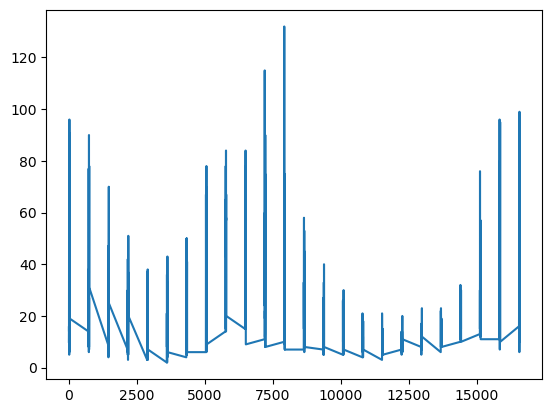

In [36]:
ggwp[ggwp["ESTACION"] == 4].NO2.plot();

In [37]:
ggwp.to_csv('../clean_visuals/NO2_2023_time.csv', index=False)

In [38]:
ggwp.head()

,ESTACION,NO2,FECHA_HORA,LONGITUD,LATITUD
0,4,10.0,2023-04-01 01:00:00,-3.712257,40.423882
1,4,12.0,2023-04-02 01:00:00,-3.712257,40.423882
2,4,11.0,2023-04-03 01:00:00,-3.712257,40.423882
3,4,16.0,2023-04-04 01:00:00,-3.712257,40.423882
4,4,14.0,2023-04-05 01:00:00,-3.712257,40.423882


### Visualización con H3

In [39]:
RES = 7

In [40]:
ggwp['h3'] = ggwp.apply(lambda x: h3.geo_to_h3(x.LATITUD, x.LONGITUD, RES), axis =1)

In [41]:
ggwp.to_csv('../clean_visuals/H3_NO2_2023_time.csv', index = False)

### Limpieza dato NO2 para todas las estaciones

In [42]:
file_paths = [
    "../data/AytoMad/daily/datos202212.csv",
    "../data/AytoMad/daily/datos202112.csv",
    "../data/AytoMad/daily/datos202012.csv",
    "../data/AytoMad/daily/datos201912.csv",
    "../data/AytoMad/daily/datos201812.csv",
    "../data/AytoMad/daily/datos201612.csv",
    "../data/AytoMad/daily/datos17.csv",
    "../data/AytoMad/daily/datos15.csv",
    "../data/AytoMad/daily/datos14.csv",
    "../data/AytoMad/daily/datos13.csv"]

dfs = {}

for i, file_path in enumerate(file_paths):
    filename = os.path.basename(file_path)  # Nombre del archivo
    df_name = f"df{i+13}"  # Nombre del DataFrame
    dfs[df_name] = pd.read_csv(file_path, sep=';')

In [43]:
df_total = pd.concat(dfs.values(), ignore_index=True)

In [44]:
df_total.shape

(17713, 69)

In [45]:
df_total.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2022,3,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N,1.0,N,0.0,N,0.0,N,3.0,V,2.0,V,1.0,V,2.0,V
1,28,79,4,1,28079004_1_38,2022,4,2.0,V,2.0,V,2.0,V,1.0,N,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,0.0,N
2,28,79,4,1,28079004_1_38,2022,5,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V
3,28,79,4,1,28079004_1_38,2022,6,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,3.0,V,3.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,3.0,V,3.0,V,3.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2022,7,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,4.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,4.0,V,4.0,V,4.0,V,4.0,V


In [46]:
dft = NO2_clean(df_total)

In [47]:
dft.head()

,ESTACION,ANO,MES,NO2
0,4,2013,1,51.354839
1,4,2013,2,44.774194
2,4,2013,3,39.000000
3,4,2013,4,33.483871
4,4,2013,5,36.161290


In [48]:
dft.shape

(2874, 4)

In [49]:
dft["NO2"] = dft["NO2"].round(2)

In [50]:
dft.head()

,ESTACION,ANO,MES,NO2
0,4,2013,1,51.35
1,4,2013,2,44.77
2,4,2013,3,39.00
3,4,2013,4,33.48
4,4,2013,5,36.16


In [51]:
dft.rename(columns={'ESTACION': 'CODIGO_CORTO'}, inplace=True)

In [52]:
estaciones.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,SO2,CO,PM10,PM2_5,O3,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,X,X,NaN,NaN,NaN,NaN,273600,PLAZA,DE,ESPAÑA,01/12/1998,"439579,3291","4475049,263",-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,X,X,X,X,X,X,18900,CALLE,DE,ALCALA,01/12/1998,"442117,2366","4474770,696",-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",708,UT,Urbana tráfico,X,NaN,NaN,NaN,NaN,NaN,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,01/12/1998,"442564,0457","4478088,595",-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,01/12/1998,"445786,1729","4476796,019",-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,NaN,NaN,NaN,NaN,X,NaN,417200,CALLE,DE,JUAN PEÑALVER,01/12/1998,"439420,7015","4466532,455",-3.713317,40.347147


In [53]:
estaciones_clean = estaciones.loc[:, ['CODIGO_CORTO', 'ESTACION', 'LONGITUD', 'LATITUD']].copy()
estaciones_clean.head()

,CODIGO_CORTO,ESTACION,LONGITUD,LATITUD
0,4,Plaza de España,-3.712257,40.423882
1,8,Escuelas Aguirre,-3.682316,40.421553
2,11,Ramón y Cajal,-3.677349,40.451473
3,16,Arturo Soria,-3.639242,40.440046
4,17,Villaverde,-3.713317,40.347147


In [54]:
hist_est = dft.merge(estaciones_clean, on='CODIGO_CORTO', how='inner')

In [55]:
hist_est.head()

,CODIGO_CORTO,ANO,MES,NO2,ESTACION,LONGITUD,LATITUD
0,4,2013,1,51.35,Plaza de España,-3.712257,40.423882
1,4,2013,2,44.77,Plaza de España,-3.712257,40.423882
2,4,2013,3,39.00,Plaza de España,-3.712257,40.423882
3,4,2013,4,33.48,Plaza de España,-3.712257,40.423882
4,4,2013,5,36.16,Plaza de España,-3.712257,40.423882


In [56]:
hist_est = hist_est.rename(columns={
    'CODIGO_CORTO': 'Codigo',
    'ANO': 'Año',
    'MES': 'Mes',
    'NO2': 'NO2',
    'ESTACION': 'Estacion',
    'LONGITUD': 'Longitud',
    'LATITUD': 'Latitud'})

In [57]:
hist_est.head()

,Codigo,Año,Mes,NO2,Estacion,Longitud,Latitud
0,4,2013,1,51.35,Plaza de España,-3.712257,40.423882
1,4,2013,2,44.77,Plaza de España,-3.712257,40.423882
2,4,2013,3,39.00,Plaza de España,-3.712257,40.423882
3,4,2013,4,33.48,Plaza de España,-3.712257,40.423882
4,4,2013,5,36.16,Plaza de España,-3.712257,40.423882


In [58]:
hist_est.shape

(2874, 7)

In [59]:
# Crear una nueva columna 'Fecha' combinando 'Año' y 'Mes'
hist_est['Fecha'] = pd.to_datetime(hist_est['Año'].astype(str) + '-' + hist_est['Mes'].astype(str), format='%Y-%m')

In [60]:
# Suponiendo que 'mi_df' es tu DataFrame
hist_est.to_csv('../clean_visuals/hist_est.csv', index=False)

In [61]:
hist_est.dtypes

Codigo               int64
Año                  int64
Mes                  int64
NO2                float64
Estacion            object
Longitud           float64
Latitud            float64
Fecha       datetime64[ns]
dtype: object